# Project Business Statistics: E-news Express



## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\abtest.csv')

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [5]:
df.shape

(100, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Getting the statistical summary for the categorical variables

In [8]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


### Check for missing values

In [9]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [11]:
df.duplicated().sum()

0

### Univariate Analysis

#### Time spent on the page

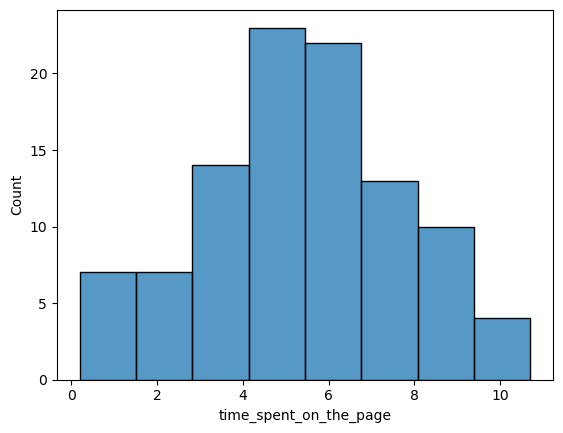

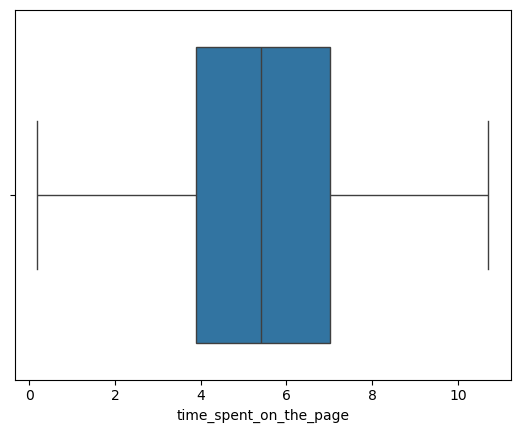

In [12]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Group

In [13]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

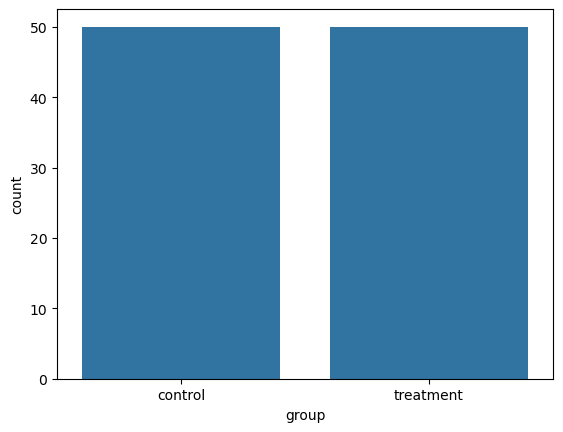

In [14]:
sns.countplot(data=df,x='group')
plt.show()

#### Landing page

In [15]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

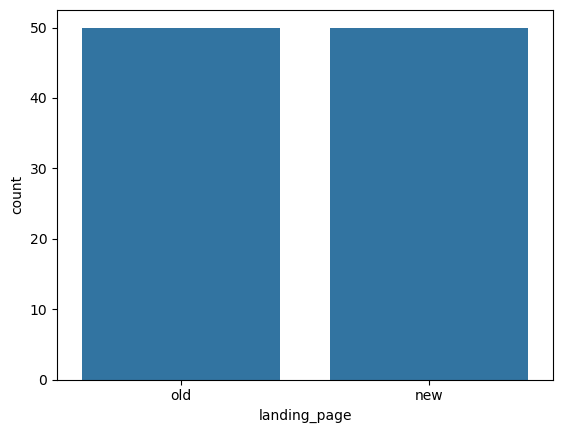

In [17]:
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

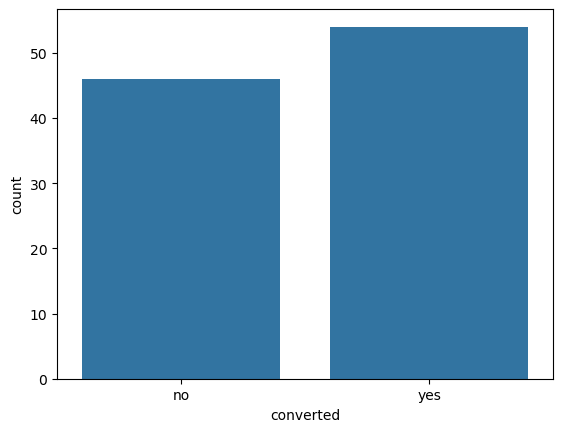

In [18]:
sns.countplot(data=df,x='converted')
plt.show()

#### Language preferred

In [20]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

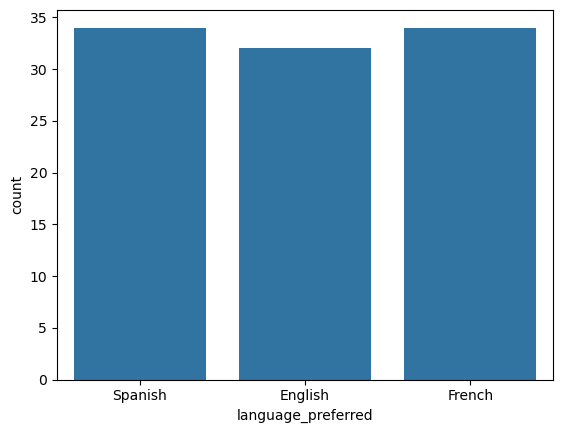

In [21]:
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

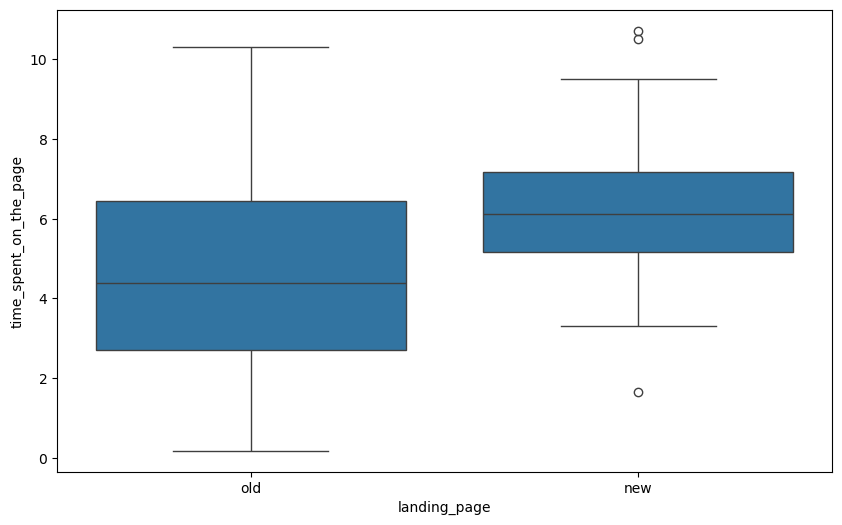

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

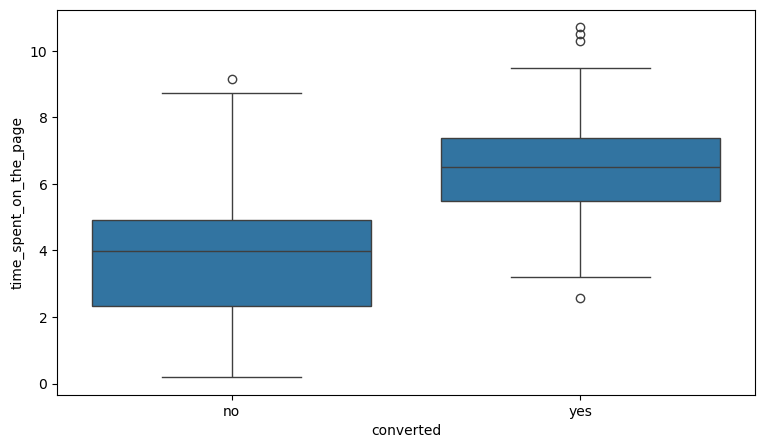

In [31]:
plt.figure(figsize=(9, 5))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page

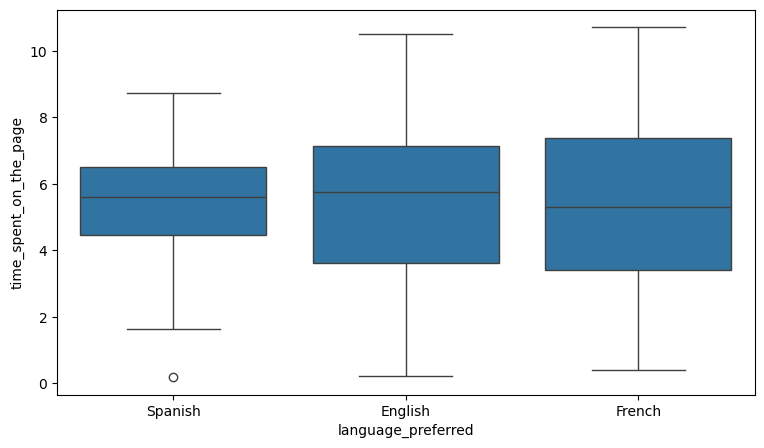

In [30]:
plt.figure(figsize=(9,5))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

### Perform Visual Analysis

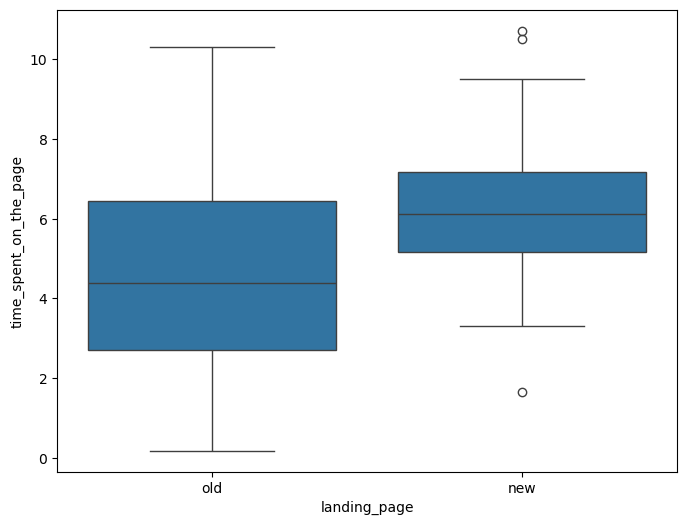

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

In [33]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [35]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

In [36]:
from scipy.stats import ttest_ind 

test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'two-sided')  

print('The p-value is', p_value)

The p-value is 0.0002784762450333098


In [37]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0002784762450333098 is less than the level of significance, we reject the null hypothesis.


### Perform Visual Analysis

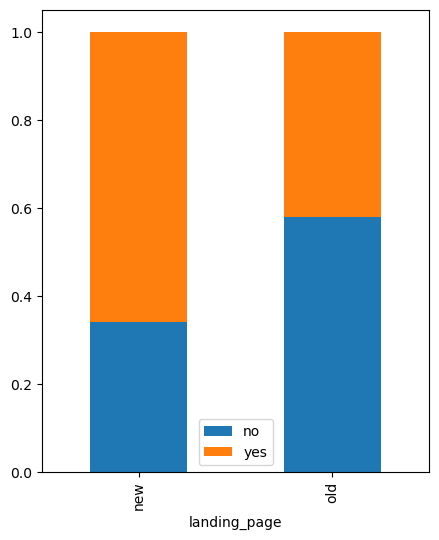

In [46]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(5,6),stacked=True)
plt.legend()
plt.show()

In [47]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] 
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [50]:
from statsmodels.stats.proportion import proportions_ztest   

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='two-sided')   
print('The p-value is', p_value)

The p-value is 0.016052616408112556


In [51]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Perform Visual Analysis

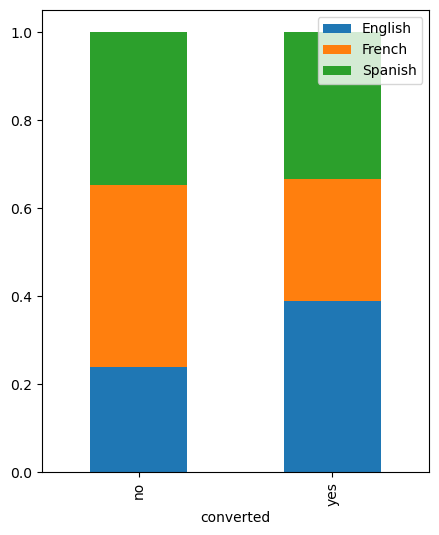

In [56]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(5,6), stacked=True)
plt.legend()
plt.show()

In [59]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [68]:
from scipy.stats import chi2_contingency  


chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [69]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Perform Visual Analysis

In [70]:
df_new = df[df['landing_page'] == 'new']

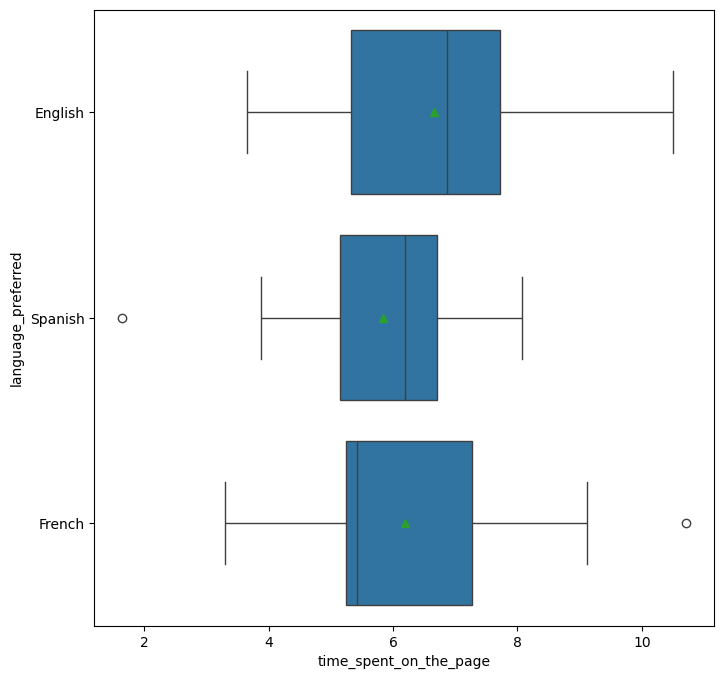

In [81]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()


In [76]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [78]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

time_spent_French = df_new[df_new['language_preferred']== 'French']['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']   

In [79]:
from scipy.stats import f_oneway 

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [80]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


___